<a href="https://colab.research.google.com/github/lakkaramnaveen/colab_projects/blob/main/DemandForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Month                  10000 non-null  int64  
 1   Region                 10000 non-null  object 
 2   Avg_Temp               10000 non-null  float64
 3   Product_Price          10000 non-null  float64
 4   Comp_Price             10000 non-null  float64
 5   Discount_Offered       10000 non-null  float64
 6   Mkt_Exp                10000 non-null  int64  
 7   Social_Media_Mentions  10000 non-null  int64  
 8   InStore_Promo          10000 non-null  int64  
 9   Dist_Coverage          10000 non-null  float64
 10  Store_Visits           10000 non-null  int64  
 11  Comp_Discount          10000 non-null  float64
 12  Cons_Income            10000 non-null  int64  
 13  Unemp_Rate             10000 non-null  float64
 14  Population             10000 non-null  int64  
 15  Pro

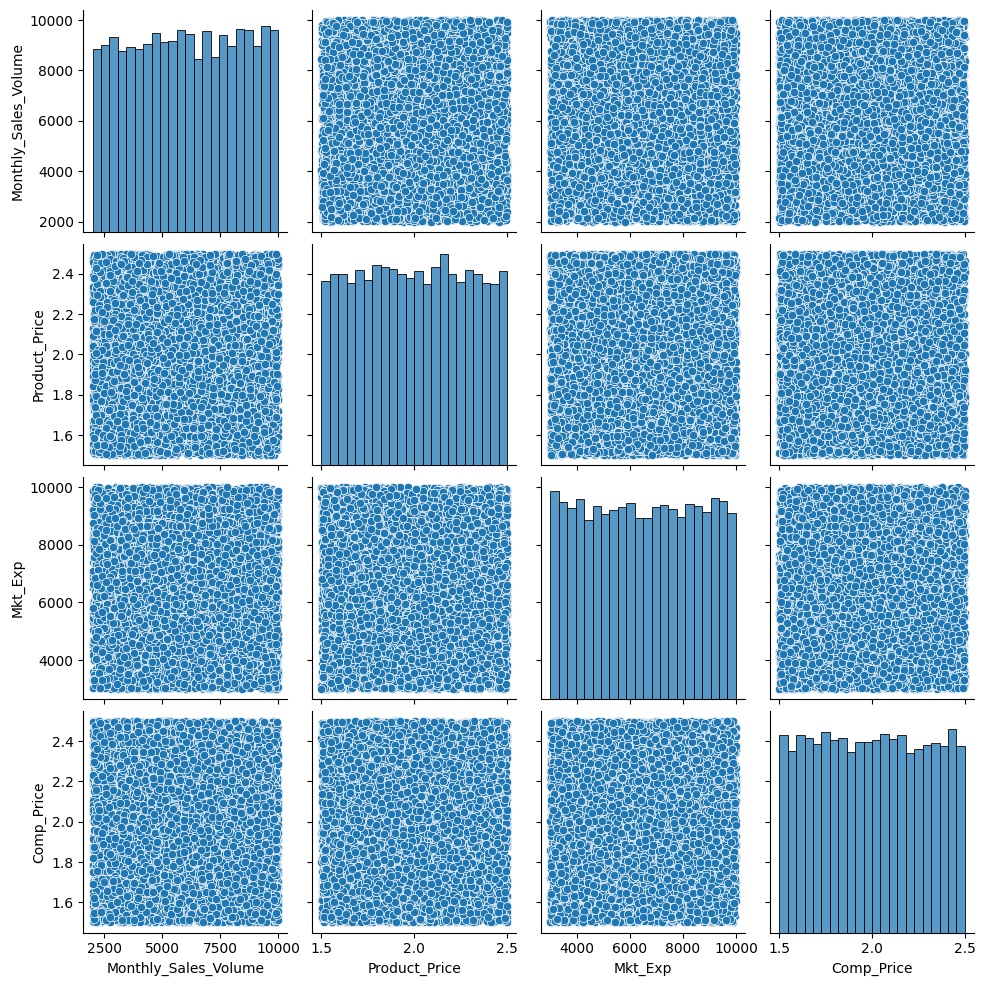

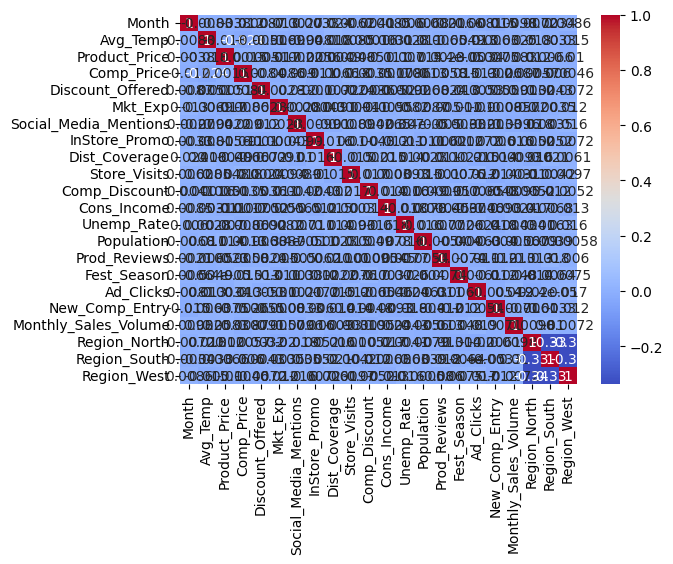

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('sample_data/CPG_Food_Beverages_Dataset - Sheet1.csv')

print(df.info())
print(df.describe())
print(df.isnull().sum())

df_encoded = pd.get_dummies(df, drop_first=True)
sns.pairplot(df, vars=['Monthly_Sales_Volume', 'Product_Price', 'Mkt_Exp', 'Comp_Price'])
plt.show()

corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler

df_encoded = pd.get_dummies(df, columns=['Month', 'Region', 'Fest_Season'], drop_first=True)

numerical_features = ['Avg_Temp', 'Product_Price', 'Comp_Price', 'Discount_Offered',
                      'Mkt_Exp', 'Store_Visits', 'Comp_Discount', 'Cons_Income',
                      'Unemp_Rate', 'Population', 'Prod_Reviews', 'Ad_Clicks']

scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])
df_encoded['Marketing_Price_Interaction'] = df_encoded['Mkt_Exp'] * df_encoded['Product_Price']

In [28]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Monthly_Sales_Volume', axis=1)
y = df_encoded['Monthly_Sales_Volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train an XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate model performance
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, mae, r2

# Evaluate all models
models = {'Linear Regression': lr_model, 'Random Forest': rf_model, 'XGBoost': xgb_model}
for name, model in models.items():
    mse, mae, r2 = evaluate_model(model, X_test, y_test)
    print(f"{name}: MSE = {mse}, MAE = {mae}, R-squared = {r2}")

Linear Regression: MSE = 5286849.02217206, MAE = 1995.0813672799757, R-squared = -0.004777658949528085
Random Forest: MSE = 5438558.2643617, MAE = 2015.7729600000002, R-squared = -0.03361034484031733
XGBoost: MSE = 5528934.983577105, MAE = 2018.819107421875, R-squared = -0.050786614418029785


# SARIMA

In [12]:
# Import SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit a SARIMA model
sarima_model = SARIMAX(df['Monthly_Sales_Volume'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_results = sarima_model.fit()

# Forecast sales for the next 12 months
forecast = sarima_results.get_forecast(steps=12)
forecast_df = forecast.summary_frame()
print(forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']])

Monthly_Sales_Volume         mean  mean_ci_lower  mean_ci_upper
10000                 6111.081806    1261.657687   10960.505924
10001                 6010.357916    1160.760986   10859.954846
10002                 6123.419264    1273.821523   10973.017005
10003                 6046.064114    1196.465773   10895.662456
10004                 5989.392953    1139.793983   10838.991922
10005                 5899.190918    1049.591292   10748.790545
10006                 6165.342106    1315.741793   11014.942420
10007                 6197.867050    1348.268343   11047.465757
10008                 6106.986103    1257.387005   10956.585201
10009                 6144.220039    1294.620504   10993.819575
10010                 6194.080621    1344.480582   11043.680659
10011                 6156.407013    1306.806439   11006.007588


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa76a94wg/5rewwezg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa76a94wg/r9lh_10q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12583', 'data', 'file=/tmp/tmpa76a94wg/5rewwezg.json', 'init=/tmp/tmpa76a94wg/r9lh_10q.json', 'output', 'file=/tmp/tmpa76a94wg/prophet_modelesblmqz3/prophet_model-20241007104005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:40:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:40:06 - cmdstanpy - INFO - Chain

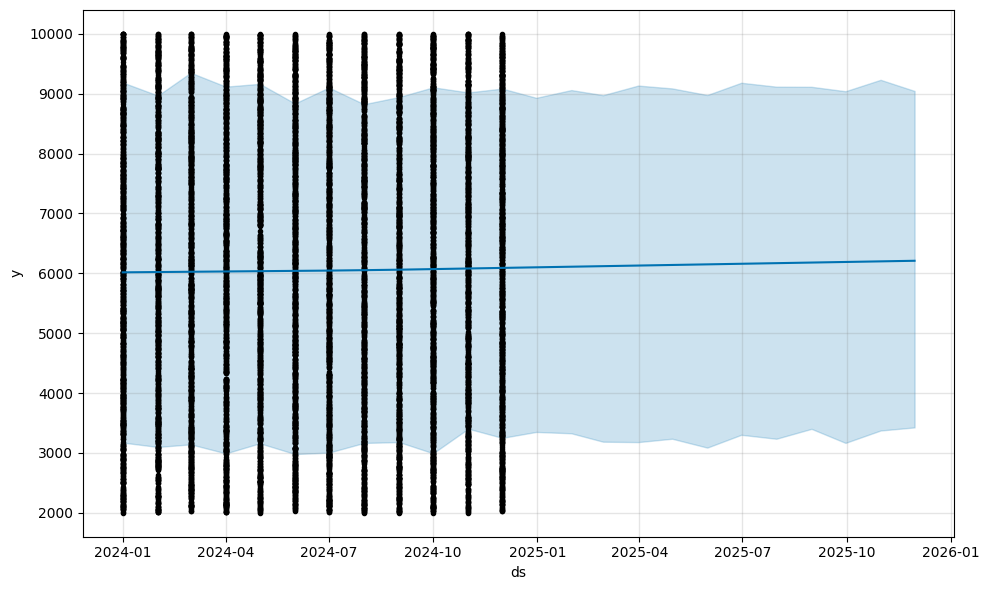

In [29]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming the dataset contains months as integers from 1-12 for each year
# If you don't have a specific year in your data, you can create a dummy year for modeling
df['Year'] = 2024  # or any other year
df['ds'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')

# Prepare the data for Prophet
df_prophet = df[['ds', 'Monthly_Sales_Volume']].rename(columns={'Monthly_Sales_Volume': 'y'})

# Initialize the Prophet model
model = Prophet()

# Fit the model on the data
model.fit(df_prophet)

# Make future predictions (for 12 months ahead)
future = model.make_future_dataframe(periods=12, freq='M')

# Predict future sales
forecast = model.predict(future)

# Visualize the forecast
model.plot(forecast)
plt.show()